In [4]:
##IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
## READ CSV FILE

df1 = pd.read_csv("../datasets/top1000_2022/social media influencers - Youtube sep-2022.csv", encoding='utf-8')
df1.head(5)

,S.no,Name,Youtuber,Country,Subscribers,Category_2,Avg. views\r\n,Avg. likes,Avg Comments,Category_3
0,1,T-Series,tseries,India,224.4M,Music & Dance,141.5K,4.6K,125,NaN
1,2,Cocomelon - Nursery Rhymes,checkgate,NaN,142.5M,Education,12.5M,64.8K,0,NaN
2,3,PewDiePie,PewDiePie,United States,111.6M,Animation,1.9M,130.5K,7.4K,NaN
3,4,MrBeast,MrBeast6000,United States,104.1M,Video games,44.8M,2.2M,70.9K,Humor
4,5,✿ Kids Diana Show,✿ Kids Diana Show,NaN,100.5M,Animation,6.9M,34.8K,0,Toys


C:\Users\dlpires\AppData\Local\Temp\ipykernel_11092\3416252590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'index': 'n'}, inplace=True)


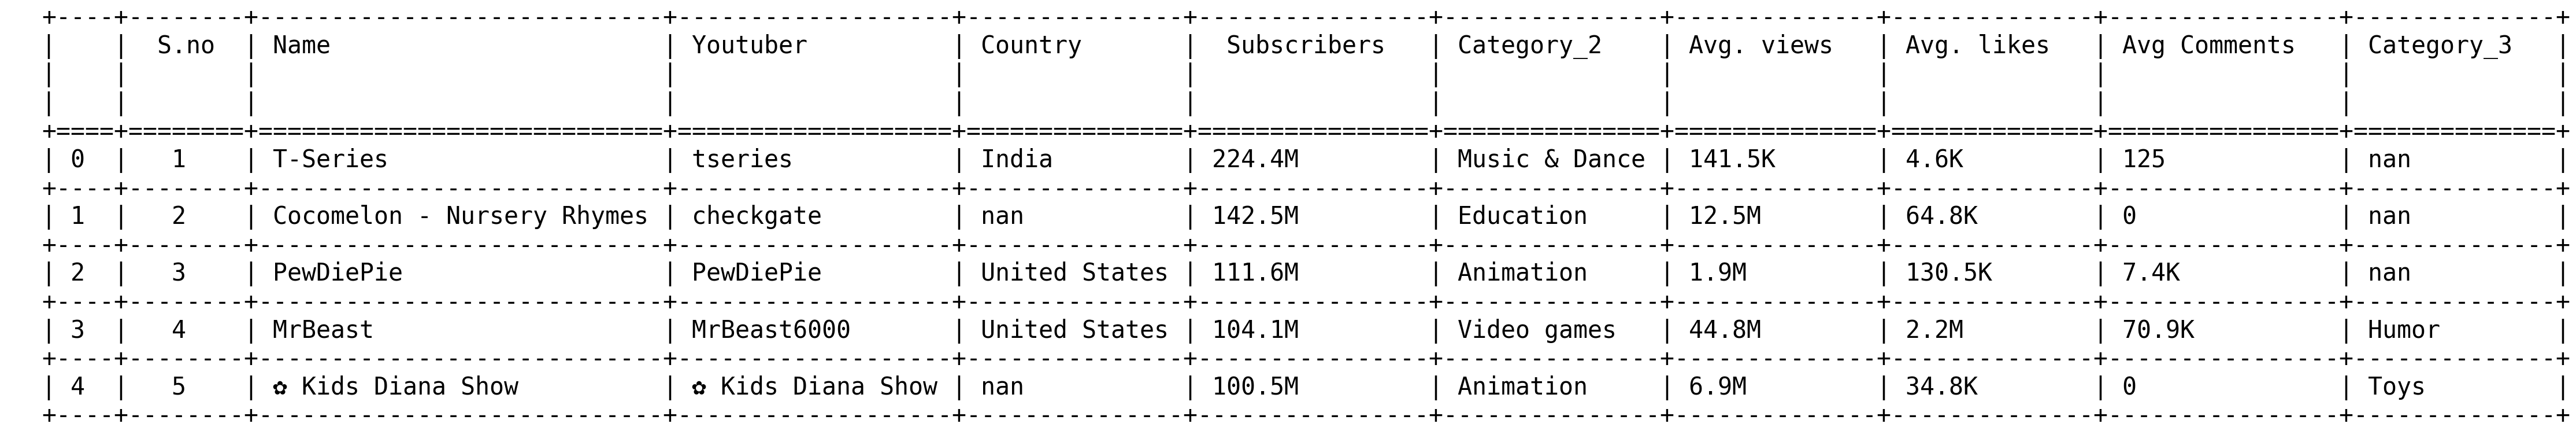

In [11]:
df2 = df1.head(5)

#df2.reset_index(level=0, inplace=True)
df2.rename(columns={'index': 'n'}, inplace=True)

from tabulate import tabulate
tabela = tabulate(df2, headers='keys', tablefmt='grid', numalign='center')

plt.figure(figsize=(8, 3))
plt.text(0.1, 0.1, tabela, {'family': 'monospace', 'size': 30})
plt.axis('off')
plt.show()

In [47]:
### FUNCTION TO CONVERT STRING MILLION/THOUSAND FORMAT TO NUMBER

def stringToNumeric(text, bad_data_val = 0):
    d = {
        'K': 1000,
        'M': 1000000,
        'B': 1000000000
    }
    if not isinstance(text, str):
        # Non-strings are bad are missing data in submission
        return bad_data_val

    elif text[-1] in d:
        # separate out the K, M, or B
        num, magnitude = text[:-1], text[-1]
        return int(float(num) * d[magnitude])
    else:
        return float(text)

In [48]:
# GET COLUMNS NAME
print(df1.columns.values)

['S.no' 'Name' 'Youtuber' 'Country' ' Subscribers' 'Category_2'
 'Avg. views\r\n' 'Avg. likes' 'Avg Comments' 'Category_3']


In [49]:
## RENAME COLUMNS
df1.rename(columns={'Name': 'nome_canal',
                    'Youtuber': 'perfil_canal',
                    'Country': 'pais',
                    ' Subscribers': 'inscritos',
                    'Avg. views\r\n': 'avg_views',
                    'Avg. likes': 'avg_likes',
                    'Avg Comments': 'avg_comments',
                   }, inplace=True)

In [50]:
## REMOVE UNUSED COLUMNS
df1.drop(columns=['S.no', 'Category_2', 'Category_3'], inplace=True)

In [51]:
## CHANGE STRING VALUES INTO AVG VALUES (SUBSCRIBERS, VIEWS, LIKES AND COMMENTS) TO FLOAT
df2 = df1

df2["inscritos"] = df2['inscritos'].apply(lambda x: stringToNumeric(x))
df2["avg_views"] = df2['avg_views'].apply(lambda x: stringToNumeric(x))
df2["avg_likes"] = df2['avg_likes'].apply(lambda x: stringToNumeric(x))
df2["avg_comments"] = df2['avg_comments'].apply(lambda x: stringToNumeric(x))
df2.head()

,nome_canal,perfil_canal,pais,inscritos,avg_views,avg_likes,avg_comments
0,T-Series,tseries,India,224400000,141500.0,4600.0,125.0
1,Cocomelon - Nursery Rhymes,checkgate,NaN,142500000,12500000.0,64800.0,0.0
2,PewDiePie,PewDiePie,United States,111600000,1900000.0,130500.0,7400.0
3,MrBeast,MrBeast6000,United States,104100000,44800000.0,2200000.0,70900.0
4,✿ Kids Diana Show,✿ Kids Diana Show,NaN,100500000,6900000.0,34800.0,0.0


In [52]:
## DESCRIBES NEW DATAFRAME
df2.describe()

,inscritos,avg_views,avg_likes,avg_comments
count,1.047000e+03,1.047000e+03,1.047000e+03,1047.000000
mean,1.836648e+07,1.237201e+06,5.503787e+04,2305.617956
std,1.406693e+07,3.765624e+06,2.125199e+05,10388.665197
min,9.900000e+06,0.000000e+00,0.000000e+00,0.000000
25%,1.140000e+07,4.600000e+04,8.375000e+02,5.000000
50%,1.400000e+07,2.255000e+05,4.500000e+03,121.000000
75%,1.970000e+07,8.812500e+05,3.185000e+04,915.500000
max,2.244000e+08,5.180000e+07,4.400000e+06,186800.000000


In [54]:
## SAVE DATAFRAME INTO CSV FILE

df2.to_csv('../datasets/top1000_2022_cleaned/youtube-sep2022.csv', index=False)